The version mentioned in the github readme (1.1.1) doesn't work.

In [1]:
%%capture
!pip install condacolab

In [2]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:39
🔁 Restarting kernel...


In [1]:
!conda create -n pyannote python=3.8.5
!conda activate pyannote

!conda install numpy cffi
!conda install libsndfile=1.0.28 -c conda-forge

!pip install https://github.com/pyannote/pyannote-audio/archive/develop.zip

Solving environment: \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local/envs/pyannote

  added / updated specs:
    - python=3.8.5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    ld_impl_linux-64-2.36.1    |       hea4e1c9_2         667 KB  conda-forge
    libffi-3.2.1               |    he1b5a44_1007          47 KB  conda-forge
    libgcc-ng-11.1.0           |       hc902ee8_8         908 KB  conda-forge
    libgomp-11.1.0 

In [1]:
%%capture
!wget https://podcast.rasset.ie/podcasts/audio/2021/0626/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.mp3

In [2]:
%%capture
!ffmpeg -i /content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.mp3 -acodec pcm_s16le -ac 1 -ar 16000 /content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.wav

In [5]:
from pyannote.audio.pipelines import VoiceActivityDetection
pipeline = VoiceActivityDetection(segmentation="pyannote/segmentation")
HYPER_PARAMETERS = {
  # onset/offset activation thresholds
  "onset": 0.5, "offset": 0.5,
  # remove speech regions shorter than that many seconds.
  "min_duration_on": 0.0,
  # fill non-speech regions shorter than that many seconds.
  "min_duration_off": 0.0
}
pipeline.instantiate(HYPER_PARAMETERS)
vad = pipeline("/content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.wav")

ImportError: ignored

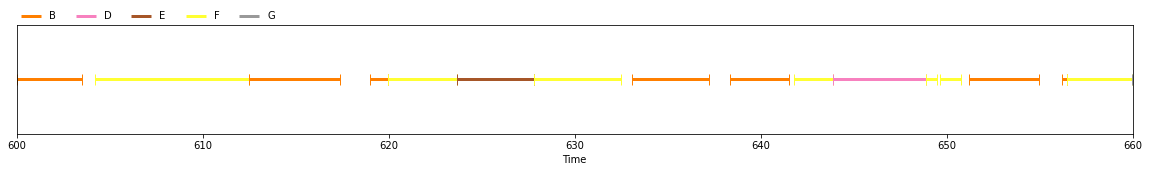

In [ ]:
diarization

In [ ]:
with open('/content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.rttm', 'w') as f:
    diarization.write_rttm(f)

In [ ]:
%%capture
!pip install youtube-dl

In [ ]:
%%capture
!youtube-dl f3wKxcP7hYE

In [ ]:
%%capture
!ffmpeg -i 'Sraith 2 Eip 1-f3wKxcP7hYE.mp4' -acodec pcm_s16le -ac 1 -ar 16000 f3wKxcP7hYE.wav

In [ ]:
diarization2 = pipeline({'audio': '/content/f3wKxcP7hYE.wav'})

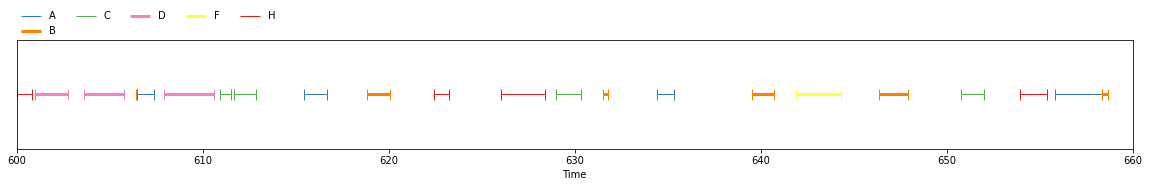

In [ ]:
diarization2

No good; first 8 seconds are silence (ok), next 30 are theme music (not ok).

In [ ]:
with open('/content/f3wKxcP7hYE.rttm', 'w') as f2:
    diarization2.write_rttm(f2)